# Análise Exploratória de Dados

## Descrição da Atividade

Este trabalho tem como objetivo desenvolver uma análise exploratória e interpretativa de dados a partir de um problema de interesse definido pelo grupo. Para isso, será utilizada uma base de dados própria ou uma base de dados existente, buscando extrair informações relevantes, identificar padrões e comunicar os resultados de forma clara e objetiva.

O foco principal do projeto está na **análise dos dados**, na **interpretação dos resultados** e na **capacidade de comunicação das descobertas**, mais do que na complexidade dos métodos ou modelos aplicados.

---

## Alunos
- Maria Fernanda  
- Lucas Gabriel  
- Samuel Araujo  
- Vivian Raquel  

---

## Descrição do Problema e Motivação

A inflação de alimentos é um dos fatores que mais impactam o custo de vida da população, especialmente no caso de produtos considerados essenciais, como arroz, trigo, óleo, açúcar e leite. Variações nos preços desses itens afetam diretamente o poder de compra das famílias e estão relacionadas a fatores econômicos, climáticos, logísticos e geopolíticos.

Diante desse contexto, este trabalho tem como objetivo analisar a evolução dos preços de produtos alimentícios essenciais ao longo do tempo, buscando identificar padrões, tendências e variações significativas nos preços praticados em diferentes países e períodos. Além disso, pretende-se investigar se os dados históricos permitem indícios de aumento ou estabilidade dos preços, utilizando técnicas simples de análise exploratória e, de forma complementar, métodos básicos de previsão.

A motivação do estudo está na relevância social e econômica do tema, uma vez que compreender o comportamento dos preços de alimentos pode auxiliar na interpretação de fenômenos inflacionários e na discussão sobre segurança alimentar, planejamento econômico e políticas públicas.

---

## Origem e Descrição da Base de Dados

A base de dados utilizada neste trabalho foi obtida na plataforma **Kaggle**, a partir do conjunto de dados intitulado **“Global Food Prices”**, disponível publicamente no endereço:

https://www.kaggle.com/datasets/jboysen/global-food-prices/data

Esse dataset é mantido pelo **World Food Programme (WFP)**, uma agência das Nações Unidas, e reúne informações históricas sobre preços de alimentos coletadas em diversos países ao longo de vários anos. Os dados são originalmente extraídos de levantamentos realizados por governos locais, mercados, organizações internacionais e outras instituições parceiras do WFP.

A base contém registros com informações como:
- País e mercado de coleta
- Produto alimentício
- Tipo de preço (varejo, atacado)
- Data da observação
- Preço e unidade de medida
- Moeda utilizada

Por se tratar de dados reais e amplamente utilizados em estudos econômicos e sociais, o conjunto apresenta características típicas de bases do mundo real, como valores ausentes, diferentes unidades de medida e variações temporais irregulares, o que exige etapas de limpeza, organização e padronização antes da análise.

A escolha dessa base se justifica pela sua abrangência temporal e geográfica, além de permitir uma análise consistente da evolução dos preços de alimentos essenciais, atendendo plenamente aos objetivos propostos para este trabalho.

---

# Análise Exploratória dos Dados

## Contextualização

A análise exploratória tem como foco compreender a evolução dos preços de produtos alimentícios essenciais ao longo do tempo, utilizando a base de dados `wfp_market_food_prices.txt`.

O objetivo principal é identificar tendências de aumento ou redução de preços, observar comportamentos inflacionários e avaliar como os valores de itens essenciais se modificaram ao longo dos anos. Além disso, busca-se realizar uma análise preliminar para verificar a possibilidade de previsão da evolução futura dos preços.

---

## Estratégia de Análise

A análise exploratória será conduzida a partir das seguintes etapas:

1. Leitura e compreensão da estrutura dos dados  
2. Tratamento e limpeza da base (remoção de valores ausentes ou inconsistentes)  
3. Seleção de produtos considerados essenciais  
4. Análise da evolução dos preços ao longo do tempo  
5. Cálculo da variação percentual dos preços como forma de observar inflação  
6. Visualização dos dados por meio de gráficos e estatísticas descritivas  
7. Exploração de uma previsão simples da tendência futura dos preços  

---


In [8]:
import pandas as pd

df = pd.read_csv(
    "dados.csv",
    encoding="latin1",
    sep=","
)

df.head()


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


## Organização e Limpeza dos Dados

Antes da realização da análise exploratória, foi realizada uma etapa de organização e limpeza dos dados, uma vez que se trata de uma base de dados real. Inicialmente, foram verificadas a presença de valores ausentes e registros duplicados. Em seguida, foram removidas observações com informações incompletas ou inconsistentes nas variáveis essenciais para a análise, como preço, produto e período temporal.

Também foi garantida a correta tipagem das variáveis numéricas, com a conversão dos valores de preço para o formato numérico e a exclusão de registros inválidos, como preços nulos ou negativos.

Esses procedimentos asseguraram maior confiabilidade aos resultados obtidos nas etapas seguintes da análise.


In [11]:
#Removendo valores nulos nas colunas importantes
df_india_essenciais = df_india_essenciais.dropna(
    subset=['mp_price', 'mp_year', 'mp_month', 'cm_name']
)
#Remover preços negativos ou zero
df_india_essenciais = df_india_essenciais[df_india_essenciais['mp_price'] > 0]


NameError: name 'df_india_essenciais' is not defined

A criação da variável de data foi realizada a partir da combinação das colunas de ano (`mp_year`) e mês (`mp_month`). Inicialmente, essas colunas foram convertidas para o tipo texto, permitindo sua concatenação no formato `YYYY-MM`. Em seguida, a função `pd.to_datetime()` foi utilizada para converter essa informação em um objeto de data, possibilitando a realização de análises temporais e a construção de gráficos ao longo do tempo.


In [ ]:
df['date'] = pd.to_datetime(
    df['mp_year'].astype(str) + '-' + df['mp_month'].astype(str)
)


Nesta etapa, foi definida uma lista de produtos considerados essenciais para a análise, incluindo arroz, trigo e pão. Em seguida, a base de dados foi filtrada de modo a manter apenas os registros correspondentes a esses produtos, utilizando a coluna que identifica o tipo de alimento. Esse procedimento permitiu concentrar a análise em itens de maior relevância para o consumo básico da população, evitando a inclusão de produtos menos representativos para o estudo de preços e inflação.


In [ ]:
# Define uma lista com os produtos considerados essenciais para a análise
# Neste caso: arroz, trigo e pão
produtos_essenciais = ['Rice', 'Wheat', 'Bread']

# Filtra o DataFrame da Índia, mantendo apenas as linhas
# cujo nome do produto (cm_name) está na lista de produtos essenciais
df_india_essenciais = df_india[df_india['cm_name'].isin(produtos_essenciais)]


Inicialmente, a base de dados foi filtrada para incluir apenas os registros referentes à Índia, garantindo que a análise fosse realizada em um único contexto econômico e monetário. Em seguida, foi criada uma variável temporal a partir da combinação das colunas de ano e mês, permitindo a conversão dessas informações em um formato de data padronizado. Essa etapa é fundamental para a análise da evolução dos preços ao longo do tempo e para a construção de séries temporais.


In [ ]:
df_india = df[df['adm0_name'] == 'India']
df_india_essenciais['date'] = pd.to_datetime(
    df_india_essenciais['mp_year'].astype(str) + '-' +
    df_india_essenciais['mp_month'].astype(str)
)


Nesta etapa, os dados foram agrupados por período de tempo e tipo de produto, utilizando a data e o nome do alimento como critérios de agrupamento. Para cada grupo, foi calculado o preço médio, o que permite suavizar variações pontuais e obter uma visão mais representativa do comportamento dos preços ao longo do tempo. Por fim, o índice gerado pelo agrupamento foi redefinido, facilitando a manipulação e a visualização dos dados nas análises subsequentes.


In [ ]:
precos_tempo = (
    df_india_essenciais
    .groupby(['date', 'cm_name'])['mp_price']
    .mean()
    .reset_index()
)


Para visualizar a evolução dos preços ao longo do tempo, foi construído um gráfico de linhas utilizando a biblioteca Matplotlib. Cada linha representa um produto essencial analisado, permitindo a comparação do comportamento dos preços entre diferentes itens. O eixo horizontal representa o tempo, enquanto o eixo vertical indica o preço médio. Esse tipo de visualização facilita a identificação de tendências, variações e possíveis períodos de aumento ou estabilidade nos preços.


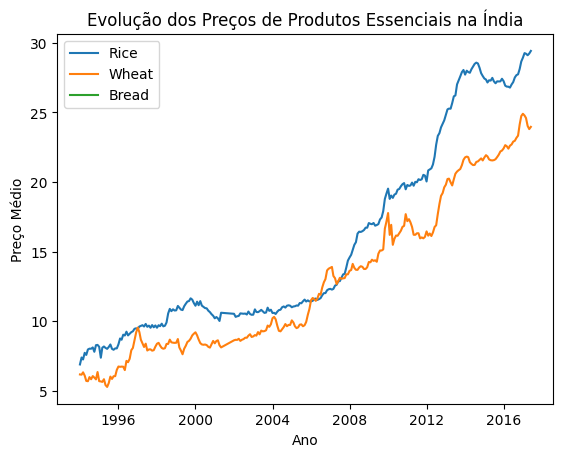

In [ ]:
import matplotlib.pyplot as plt

for produto in produtos_essenciais:
    dados = precos_tempo[precos_tempo['cm_name'] == produto]
    plt.plot(dados['date'], dados['mp_price'], label=produto)

plt.xlabel('Ano')
plt.ylabel('Preço Médio')
plt.title('Evolução dos Preços de Produtos Essenciais na Índia')
plt.legend()
plt.show()


### Análise de inflação (variação percentual)

A inflação foi estimada a partir do cálculo da variação percentual dos preços médios ao longo do tempo. Para isso, os dados foram agrupados por tipo de produto, permitindo que a variação fosse calculada individualmente para cada item. Em seguida, foi aplicada a função de variação percentual entre períodos consecutivos, expressando os resultados em porcentagem. Esse procedimento possibilita identificar períodos de aumento ou redução dos preços, servindo como um indicador da inflação dos produtos analisados.


In [ ]:
precos_tempo['inflacao_percentual'] = (
    precos_tempo
    .groupby('cm_name')['mp_price']
    .pct_change() * 100
)


In [ ]:
inflacao_media = (
    precos_tempo
    .groupby('cm_name')['inflacao_percentual']
    .mean()
)

inflacao_media


cm_name
Rice     0.548803
Wheat    0.535028
Name: inflacao_percentual, dtype: float64

Para explorar a tendência futura dos preços, foi aplicada uma regressão linear simples utilizando os dados históricos do preço do arroz. Inicialmente, os dados foram filtrados para esse produto específico, e a variável tempo foi representada por uma sequência numérica crescente. O modelo foi ajustado considerando o preço como variável dependente e o tempo como variável independente.

A regressão linear permitiu identificar a tendência geral de evolução dos preços ao longo do período analisado. O resultado foi visualizado por meio de um gráfico que compara os valores reais observados com a tendência estimada pelo modelo, representada por uma linha pontilhada. Ressalta-se que essa previsão tem caráter exploratório e não substitui modelos econômicos mais complexos.


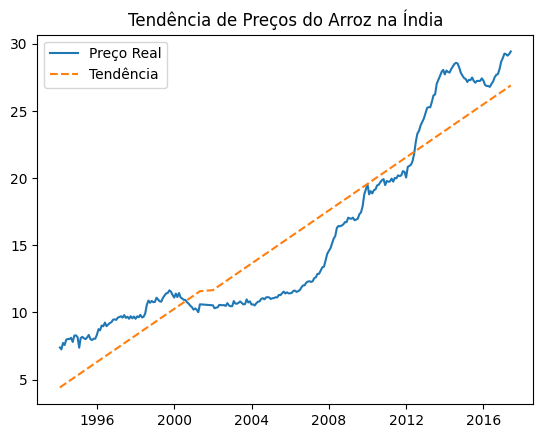

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

rice = precos_tempo[precos_tempo['cm_name'] == 'Rice'].dropna()

X = np.arange(len(rice)).reshape(-1, 1)
y = rice['mp_price'].values

modelo = LinearRegression()
modelo.fit(X, y)

rice['previsao'] = modelo.predict(X)
plt.plot(rice['date'], rice['mp_price'], label='Preço Real')
plt.plot(rice['date'], rice['previsao'], linestyle='--', label='Tendência')
plt.title('Tendência de Preços do Arroz na Índia')
plt.legend()
plt.show()


A análise realizada permitiu observar o comportamento dos preços de produtos como arroz, trigo e pão ao longo do tempo, assim como identificar tendências de variação e inflação. ao verificar o gráfico de evolução dos preços médios, foi possível identificar que os três produtos apresentaram variações significativas ao longo do período analisado. O arroz destacou-se por apresentar uma tendência geral de crescimento, indicando um aumento gradual do preço médio ao longo dos anos. O trigo e o pão, por sua vez, demonstraram oscilações mais suaves quando comparados ao arroz.

Por fim, a aplicação do modelo de regressão linear mostrou que entre os anos de 2000 a 2011, os preços reais mantiveram-se abaixo da linha de tendência projetada, indicando um período de relativa estabilidade. Já a partir de 2012, o preço real superou a linha de tendência, o que mostrou que os preços de produtos básicos na Índia têm apresentado crescimento real ao longo do tempo.